In [ ]:
%load_ext autoreload
%load_ext nb_black
%load_ext blackcellmagic

%autoreload 2
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import glob
import pickle
import seaborn as sns
from tqdm import trange
from scipy.spatial.transform import Rotation as R

from tqdm import tqdm

from typing import Dict, Tuple, Union
from nptyping import NDArray

from ikpy.chain import Chain
from ikpy.link import OriginLink, URDFLink

# from nmf_ik.head_kinematics import get_array
from nmf_ik.utils import from_anipose_to_array
from nmf_ik.data import BOUNDS, NMF_SIZE, NMF_TEMPLATE, INITIAL_ANGLES

DATA_PATH = Path(
    "/Volumes/data2/GO/7cam/220713_aJO-GAL4xUAS-CsChr/Fly002/002_Beh/behData/pose-3d"
)  # Path("../data/anipose/normal_case")

aligned_pose_pp = pd.read_pickle(DATA_PATH / "pose3d_aligned.pkl")

joint_angles_pp = pd.read_pickle(DATA_PATH / "body_joint_angles.pkl")

ANGLES = [
    "ThC_yaw",
    "ThC_pitch",
    "ThC_roll",
    "CTr_pitch",
    "CTr_roll",
    "FTi_pitch",
    "TiTa_pitch",
]

In [2]:
def plot_func(x,y, ax=None, export_path=None, **kwargs):
    """Plot histogram and KDE of data."""
    xlabel = kwargs.get("xlabel", "")
    ylabel = kwargs.get("ylabel", "")

    title = kwargs.get("title", "")
    
    label = kwargs.get("label", '')
    color = kwargs.get("color", "steelblue")
    ls = kwargs.get("ls", 'solid')
    alpha = kwargs.get("alpha", 1)

    if ax is None:
        fig, ax = plt.subplots()


    ax.plot(
        x,y,
        label=label,
        alpha=alpha, ls=ls
    )

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.legend(frameon=False)

    sns.despine()

    if export_path is not None:
        plt.savefig(export_path, bbox_inches="tight")


<IPython.core.display.Javascript object>


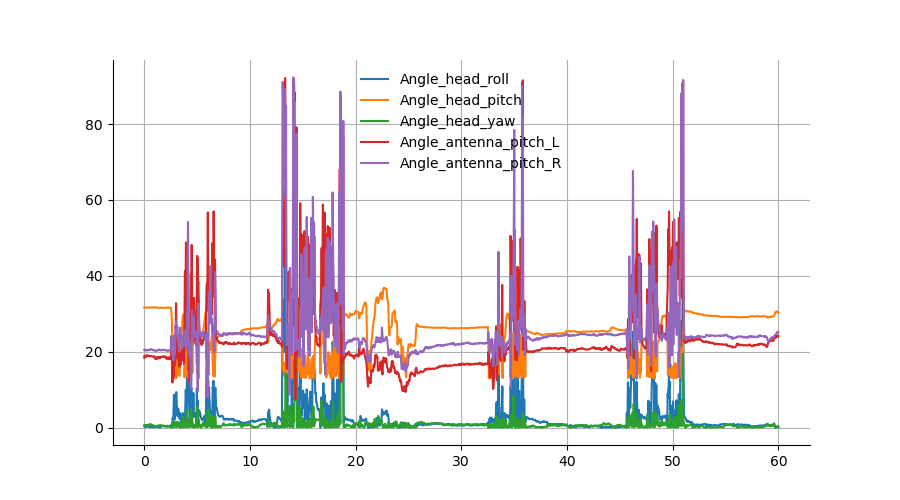

<IPython.core.display.Javascript object>

In [4]:
%matplotlib notebook
time = np.arange(0, 60, 1.0/100.0)

fig, ax = plt.subplots(figsize=(9, 5), dpi=100)

for angle_name in joint_angles_pp:
    if 'head' in angle_name or 'antenna_pitch' in angle_name:
        
        plot_func(
            time,
            np.rad2deg(joint_angles_pp[angle_name]),
            ax=ax,
            label=angle_name, ls='solid'
        )

        
ax.grid(True)
# plt.xlim(31, 39)

#export_path = "../results/antenna_pitch_compare.png"

# fig.savefig(export_path, bbox_inches="tight")


In [1]:
""" Example usage of head inverse kinematics module. """
import pickle
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from nmf_ik.head_inverse_kinematics import HeadInverseKinematics
from nmf_ik.data import NMF_TEMPLATE


class_hk = HeadInverseKinematics(
    aligned_pos=aligned_pose_pp,
    nmf_template=NMF_TEMPLATE,
)
joint_angles = class_hk.compute_head_angles(export_path=None)


fig, ax = plt.subplots()

time_step = 1e-2
time = np.arange(0, joint_angles['Angle_head_roll'].shape[0], 1) * time_step

for kp, angle in joint_angles.items():
    ax.plot(time, np.rad2deg(angle), label=kp[6:].replace('_', ' '))

plt.xlabel('Time (sec)')
plt.ylabel('Angles(deg)')
plt.title('Head inverse kinematics')
plt.legend()
plt.grid(True)
plt.show()


SyntaxError: invalid syntax (head_inverse_kinematics.py, line 216)

<IPython.core.display.Javascript object>


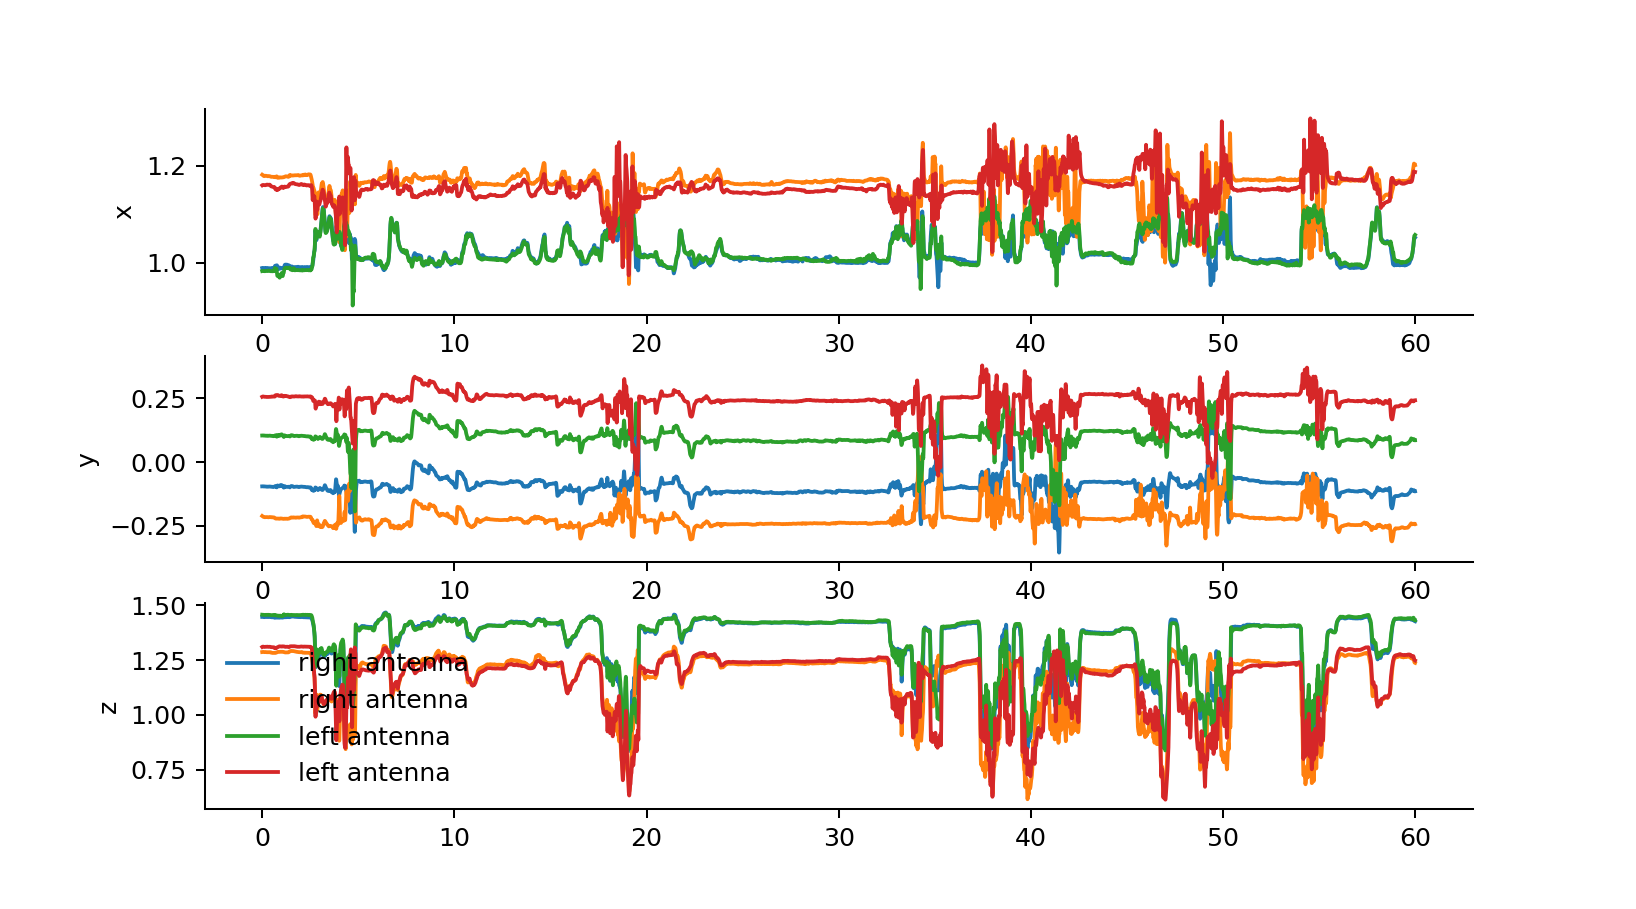

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>

In [6]:
%matplotlib notebook
time = np.arange(0, 60, 1.0/120.0)

fig, axs = plt.subplots(3,1,figsize=(9, 5), dpi=100)

plot_func(
    time,
    aligned_pose_pp['R_head'][:, :, 0],
    ax=axs[0], ylabel='x',
    ls='solid'
)

plot_func(
    time,
    aligned_pose_pp['R_head'][:, :, 1],
    ax=axs[1], ylabel='y',
    ls='solid'
)

plot_func(
    time,
    aligned_pose_pp['R_head'][:, :, 2],
    ax=axs[2], ylabel='z',
    label='right antenna', ls='solid'
)

plot_func(
    time,
    aligned_pose_pp['L_head'][:, :, 0],
    ax=axs[0], ylabel='x',
    ls='solid'
)

plot_func(
    time,
    aligned_pose_pp['L_head'][:, :, 1],
    ax=axs[1], ylabel='y',
    ls='solid'
)

plot_func(
    time,
    aligned_pose_pp['L_head'][:, :, 2],
    ax=axs[2], ylabel='z',
    label='left antenna', ls='solid'
)

        
ax.grid(True)
# plt.xlim(31, 39)

#export_path = "../results/antenna_pitch_compare.png"

# fig.savefig(export_path, bbox_inches="tight")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

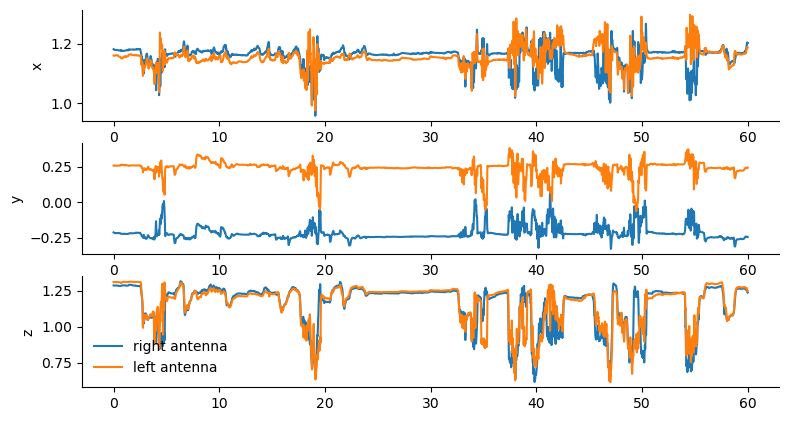

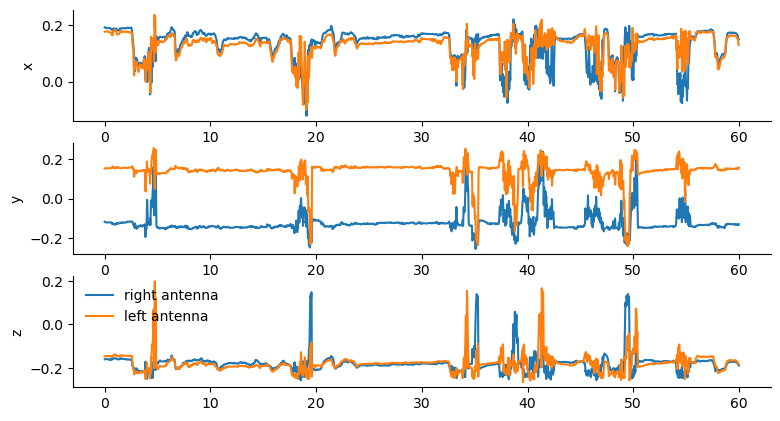

<IPython.core.display.Javascript object>

In [7]:
%matplotlib inline
time = np.arange(0, 60, 1.0/120.0)

fig, axs = plt.subplots(3,1,figsize=(9, 5), dpi=100)

plot_func(
    time,
    aligned_pose_pp['R_head'][:, 1, 0],
    ax=axs[0], ylabel='x',
    ls='solid'
)

plot_func(
    time,
    aligned_pose_pp['R_head'][:, 1, 1],
    ax=axs[1], ylabel='y',
    ls='solid'
)

plot_func(
    time,
    aligned_pose_pp['R_head'][:, 1, 2],
    ax=axs[2], ylabel='z',
    label='right antenna', ls='solid'
)

plot_func(
    time,
    aligned_pose_pp['L_head'][:, 1, 0],
    ax=axs[0], ylabel='x',
    ls='solid'
)

plot_func(
    time,
    aligned_pose_pp['L_head'][:, 1, 1],
    ax=axs[1], ylabel='y',
    ls='solid'
)

plot_func(
    time,
    aligned_pose_pp['L_head'][:, 1, 2],
    ax=axs[2], ylabel='z',
    label='left antenna', ls='solid'
)

        
ax.grid(True)
# plt.xlim(31, 39)

#export_path = "../results/antenna_pitch_compare.png"

# fig.savefig(export_path, bbox_inches="tight")


time = np.arange(0, 60, 1.0/120.0)

fig, axs = plt.subplots(3,1,figsize=(9, 5), dpi=100)

plot_func(
    time,
    aligned_pose_pp['R_head'][:, 1, 0] - aligned_pose_pp['R_head'][:, 0, 0],
    ax=axs[0], ylabel='x',
    ls='solid'
)

plot_func(
    time,
    aligned_pose_pp['R_head'][:, 1, 1] - aligned_pose_pp['R_head'][:, 0, 1],
    ax=axs[1], ylabel='y',
    ls='solid'
)

plot_func(
    time,
    aligned_pose_pp['R_head'][:, 1, 2] - aligned_pose_pp['R_head'][:, 0, 2],
    ax=axs[2], ylabel='z',
    label='right antenna', ls='solid'
)

plot_func(
    time,
    aligned_pose_pp['L_head'][:, 1, 0] - aligned_pose_pp['L_head'][:, 0, 0],
    ax=axs[0], ylabel='x',
    ls='solid'
)

plot_func(
    time,
    aligned_pose_pp['L_head'][:, 1, 1] - aligned_pose_pp['L_head'][:, 0, 1],
    ax=axs[1], ylabel='y',
    ls='solid'
)

plot_func(
    time,
    aligned_pose_pp['L_head'][:, 1, 2] - aligned_pose_pp['L_head'][:, 0, 2],
    ax=axs[2], ylabel='z',
    label='left antenna', ls='solid'
)

        
ax.grid(True)
# plt.xlim(31, 39)

#export_path = "../results/antenna_pitch_compare.png"

# fig.savefig(export_path, bbox_inches="tight")



In [ ]:
aligned_pose_pp["R_head"].shape

Create the antennal chain. 

Base is the antennal base, and we calculate the antennal yaw and pitch to achieve the end effector position.


* Set the kinematic chain 
* Keep the base 0 and feed the difference between the base and the edge. 

In [8]:
def calculate_ik(kinematic_chain: Chain, target_pos, initial_angles=None):
    """Calculates the joint angles in the leg chain."""
    # don't take the last and first ones ¨
    return kinematic_chain.inverse_kinematics(
        target_position=target_pos, initial_position=initial_angles
    )


def calculate_fk(kinematic_chain: Chain, joint_angles):
    """Calculates the forward kinematics from the joint dof angles."""
    fk = kinematic_chain.forward_kinematics(joint_angles, full_kinematics=True)
    end_effector_positions = np.zeros((len(kinematic_chain.links), 3))
    for link in range(len(kinematic_chain.links)):
        end_effector_positions[link, :] = fk[link][:3, 3]
    # take pos_right[3:, : ,:]
    return end_effector_positions

<IPython.core.display.Javascript object>

In [9]:
def create_antennal_kinematic_chain(nmf_size):
    """Returns the head kinematic chain.

    Returns
    -------
    Chain
    """

    links = [
        OriginLink(),
        URDFLink(
            name="Antenna_pitch",
            origin_translation=[0, 0, 0],
            origin_orientation=[0, 0, 0],
            rotation=[0, 1, 0],
            joint_type="revolute",
            bounds=(-np.pi, np.pi),
        ),
        URDFLink(
            name="Antenna_yaw",
            origin_translation=[0, 0, 0],
            origin_orientation=[0, 0, 0],
            rotation=[1, 0, 0],
            joint_type="revolute",
            bounds=(-np.pi, np.pi),
        ),
        # We need to put origin orientation into account, that's why.
        URDFLink(
            name="Antenna_edge",
            origin_translation=[0, 0, -0.26916920197993405],
            origin_orientation=[0, 0, 0],
            rotation=[0, 1, 0],
            bounds=(-np.pi, np.pi),
        ),
    ]
    return Chain(name="head", links=links)

<IPython.core.display.Javascript object>

In [10]:
aligned_pose_pp["R_head"][:, 1, :].shape

(7200, 3)

<IPython.core.display.Javascript object>

In [17]:
np.mean(np.linalg.norm(end_effector_pos, axis=1))

0.26916920197993405

<IPython.core.display.Javascript object>

In [12]:
chain = create_antennal_kinematic_chain(NMF_SIZE)

end_effector_pos = (
    aligned_pose_pp["R_head"][:, 1, :] - aligned_pose_pp["R_head"][:, 0, :]
)

frames_no = end_effector_pos.shape[0]


origin = np.zeros((1, 3))

joint_angles = np.empty((frames_no, len(chain.links)))


if origin.size == 3:
    origin = np.tile(origin, (frames_no, 1))

initial_angles = [0, 0, 0, 0]


# Initialize the arrays
joint_angles = np.empty((frames_no, len(chain.links)))
forward_kinematics = np.empty((frames_no, len(chain.links), 3))

# Start the IK process
for t in trange(frames_no):
    initial_angles = initial_angles if t == 0 else joint_angles[t - 1, :]
    joint_angles[t, :] = calculate_ik(chain, end_effector_pos[t, :], initial_angles)

    forward_kinematics[t, :] = (
        calculate_fk(chain, joint_angles[t, :]) + aligned_pose_pp["R_head"][t, 0, :]
    )

/Users/ozdil/Desktop/GIT/neuromechfly-inverse-kinematics/ikpy_submodule/src/ikpy/chain.py:60: UserWarning: Link Base link (index: 0) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive
  warnings.warn("Link {} (index: {}) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive".format(link.name, link_index))
100%|████████████████████████████████████████████████████████████████████████████████████████| 7200/7200 [01:09<00:00, 103.79it/s]


<IPython.core.display.Javascript object>

In [13]:
joint_angles.shape

(7200, 4)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


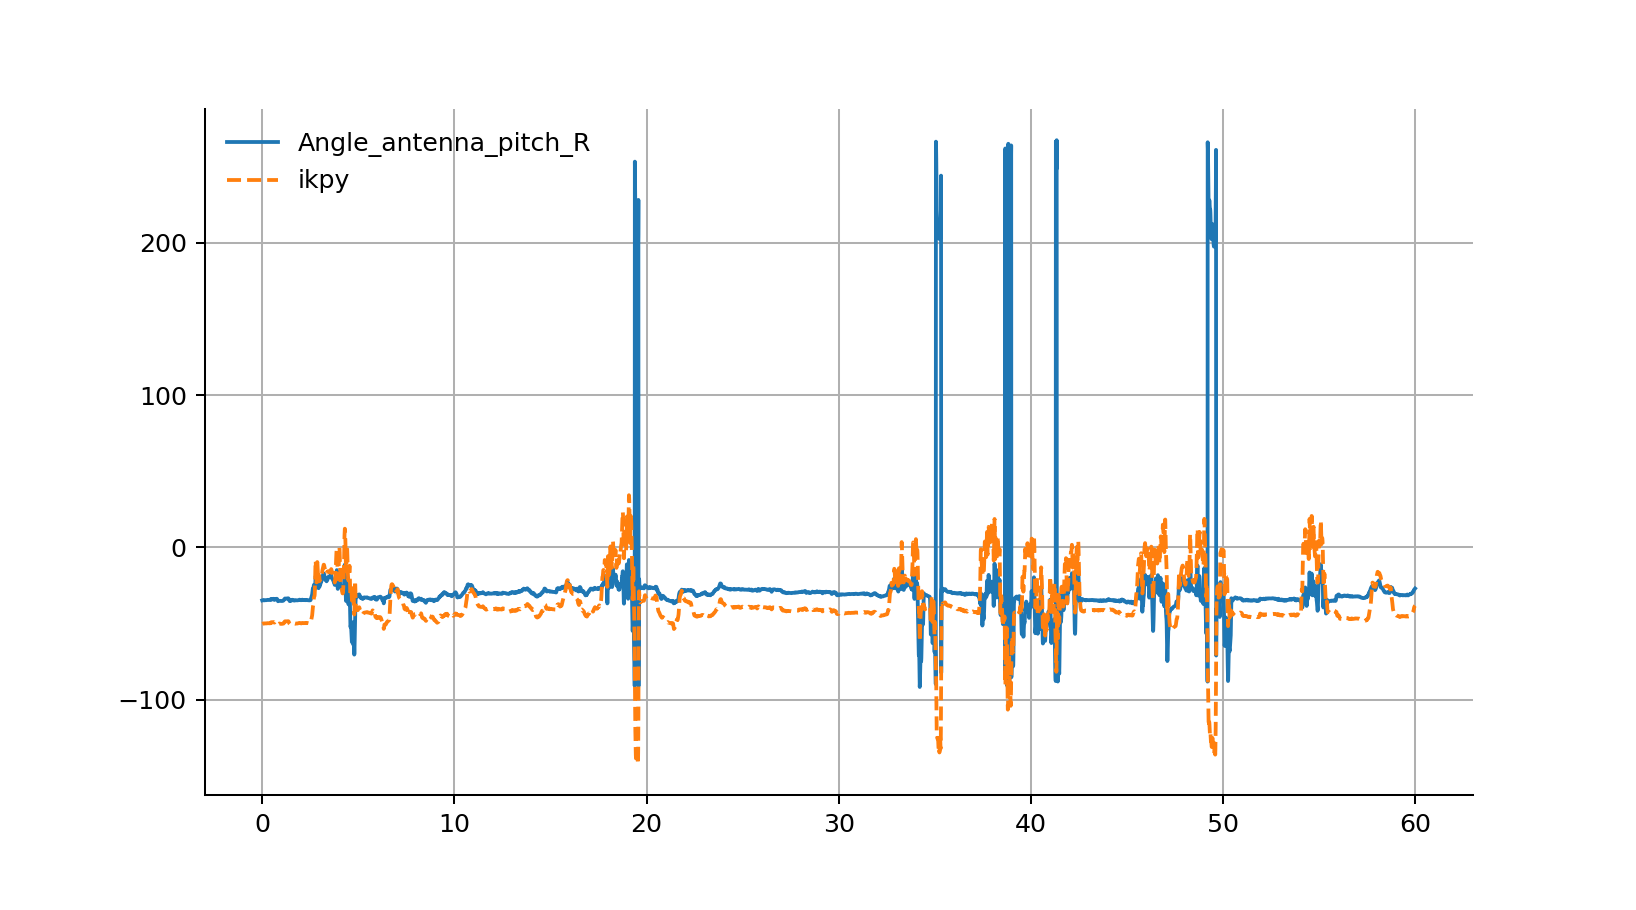

<IPython.core.display.Javascript object>

In [32]:
%matplotlib notebook
time = np.arange(0, 60, 1.0/120.0)

fig, ax = plt.subplots(figsize=(9, 5), dpi=100)

for angle_name in joint_angles_pp:
    if 'antenna_pitch_R' in angle_name:
        
        plot_func(
            time,
            np.rad2deg(joint_angles_pp[angle_name]),
            ax=ax,
            label=angle_name, ls='solid'
        )

plot_func(
    time,
    np.rad2deg(joint_angles[:,1]),# - joint_angles_pp['Angle_head_pitch'],
    ax=ax,
    label='ikpy', ls='--'
)

        
ax.grid(True)
# plt.xlim(31, 39)

#export_path = "../results/antenna_pitch_compare.png"

# fig.savefig(export_path, bbox_inches="tight")


<IPython.core.display.Javascript object>


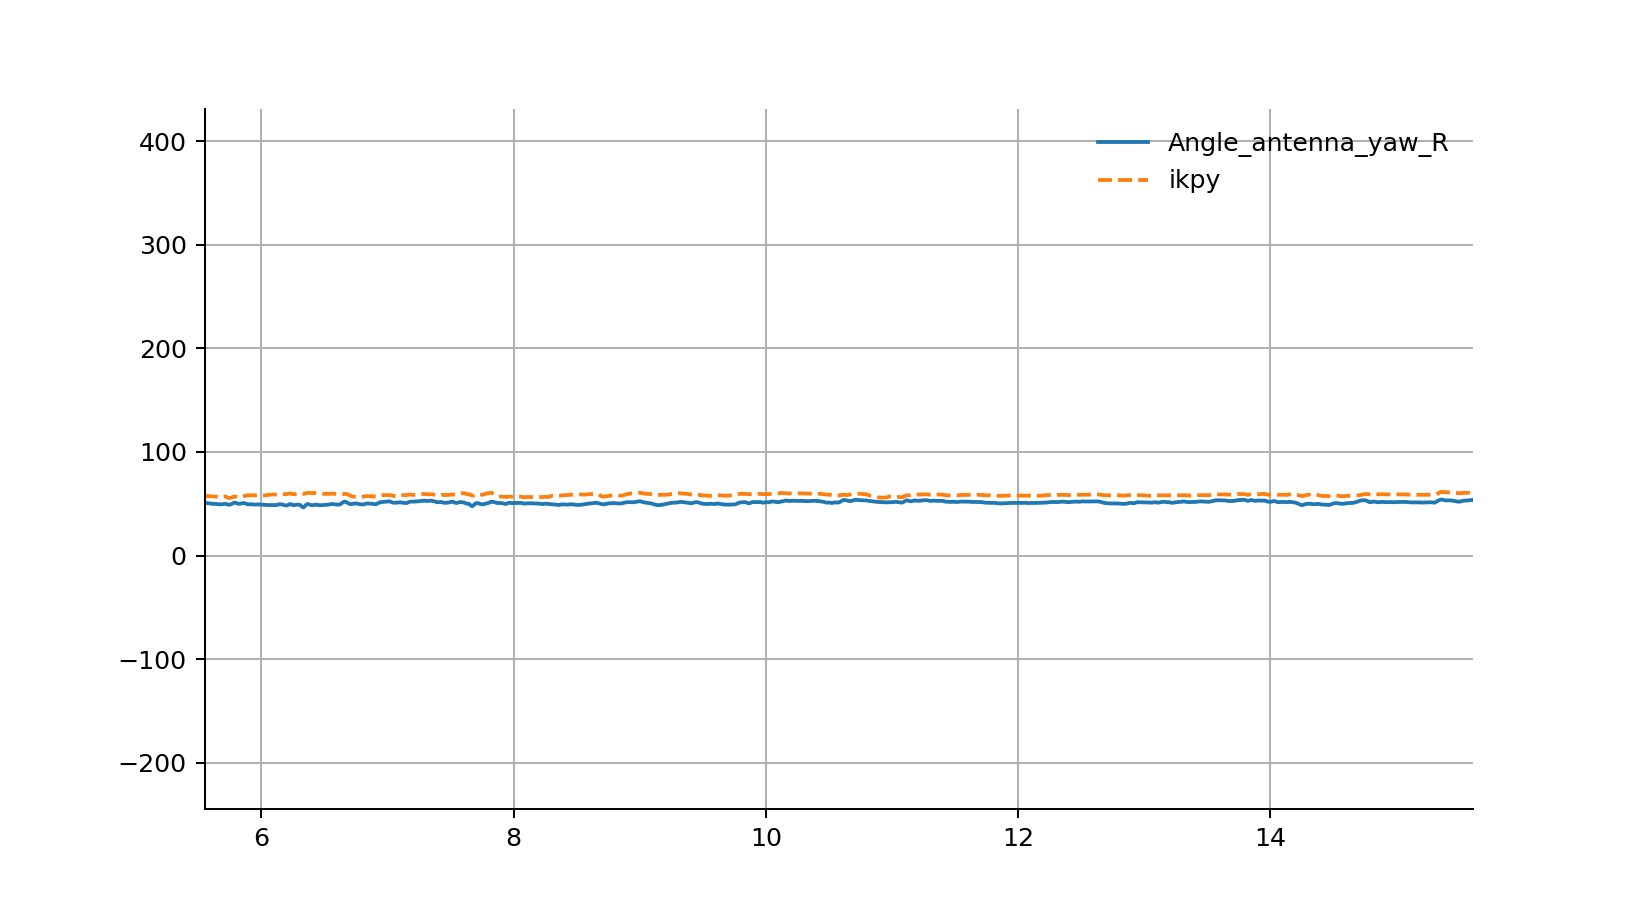

<IPython.core.display.Javascript object>

In [20]:
%matplotlib notebook
time = np.arange(0, 60, 1.0/120.0)

fig, ax = plt.subplots(figsize=(9, 5), dpi=100)

for angle_name in joint_angles_pp:
    if 'antenna_yaw_R' in angle_name:
        
        plot_func(
            time,
            np.rad2deg(joint_angles_pp[angle_name]),
            ax=ax,
            label=angle_name, ls='solid'
        )

plot_func(
    time,
    np.rad2deg(joint_angles[:,2]) + 90,
    ax=ax,
    label='ikpy', ls='--'
)

        
ax.grid(True)
# plt.xlim(31, 39)

#export_path = "../results/antenna_pitch_compare.png"

# fig.savefig(export_path, bbox_inches="tight")


<IPython.core.display.Javascript object>


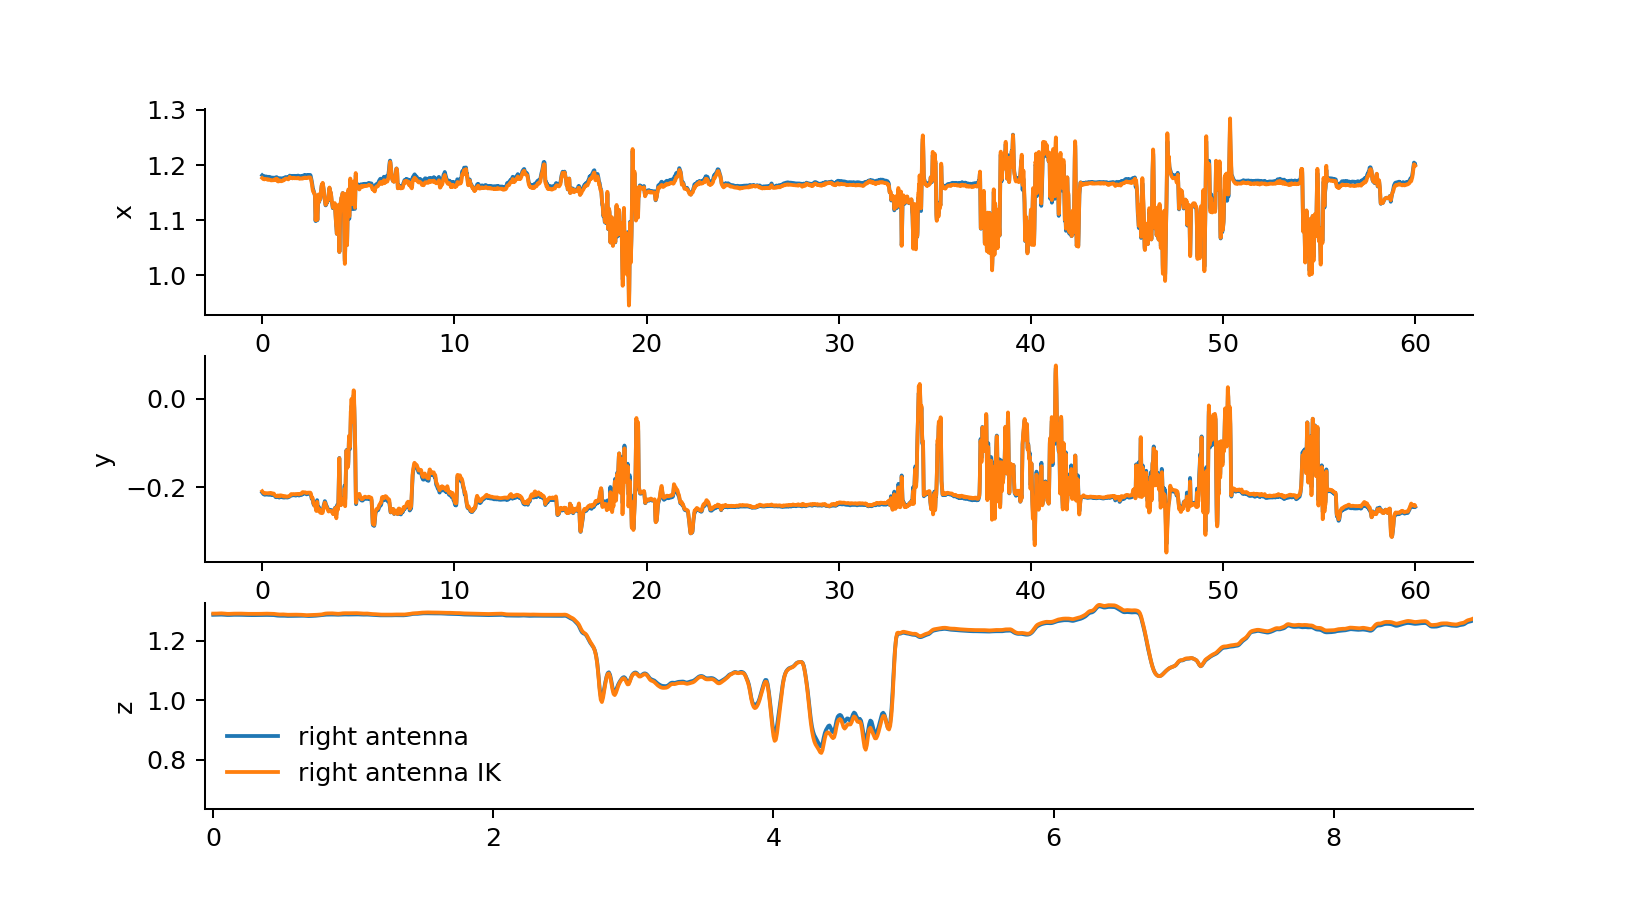

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>

In [16]:
%matplotlib notebook
fig, axs = plt.subplots(3, 1, figsize=(9, 5), dpi=100)

plot_func(time, aligned_pose_pp["R_head"][:, 1, 0], ax=axs[0], ylabel="x", ls="solid")

plot_func(time, aligned_pose_pp["R_head"][:, 1, 1], ax=axs[1], ylabel="y", ls="solid")

plot_func(
    time,
    aligned_pose_pp["R_head"][:, 1, 2],
    ax=axs[2],
    ylabel="z",
    label="right antenna",
    ls="solid",
)

plot_func(time, forward_kinematics[:, -1, 0], ax=axs[0], ylabel="x", ls="solid")

plot_func(time, forward_kinematics[:, -1, 1], ax=axs[1], ylabel="y", ls="solid")

plot_func(
    time,
    forward_kinematics[:, -1, 2],
    ax=axs[2],
    ylabel="z",
    label="right antenna IK",
    ls="solid",
)


ax.grid(True)

In [ ]:
forward_kinematics.shape

In [28]:
%matplotlib inline

import utils_video


def fig_to_array(fig):
    fig.canvas.draw()
    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return data


def plot_together(
    points_nmf, points_df3d, x_limits, y_limits, z_limits, points_fk=None, **kwargs
):
    """Plots DF3D, aligned pose and the forward kinematics from aligned pose together."""
    fig = plt.figure(dpi=100)
    ax3d = plt.axes(projection="3d")
    #     ax3d.view_init(elev=ax3d.elev, azim=90)
    ax3d.view_init(elev=0, azim=0)

    label1 = kwargs.get("label1", "aligned")
    label2 = kwargs.get("label2", "raw")
    label3 = kwargs.get("label3", "fk")
    video = kwargs.get("video", True)

    ax3d.set_xlim3d(x_limits)
    ax3d.set_ylim3d(y_limits)
    ax3d.set_zlim3d(z_limits)

    ax3d.set_xticklabels([])
    ax3d.set_yticklabels([])
    ax3d.set_zticklabels([])
    ax3d.set_xticks([])
    ax3d.set_yticks([])
    ax3d.set_zticks([])

    ax3d.scatter(
        points_nmf[:, 0],
        points_nmf[:, 1],
        points_nmf[:, 2],
        #         linewidth=2,
        #         linestyle="--",
        color="firebrick",
        label=label1,
    )
    ax3d.scatter(
        points_df3d[:, 0],
        points_df3d[:, 1],
        points_df3d[:, 2],
        #         linewidth=2,
        #         linestyle="--",
        color="steelblue",
        label=label2,
    )
    if points_fk is not None:
        ax3d.scatter(
            points_fk[:, 0],
            points_fk[:, 1],
            points_fk[:, 2],
            #             linewidth=2,
            #             linestyle=":",
            color="black",
            label=label3,
        )

    ax3d.legend(loc="upper right")

    if video:
        data = fig_to_array(fig)
        plt.close()
        return data


def df3d_3d_points(points_nmf, points_df3d, points_fk=None, **kwargs):
    def generator():
        for ts in range(1000):
            if points_fk is not None:
                img = plot_together(
                    points_nmf[ts],
                    points_df3d[ts],
                    # (-1, 1),
                    # (-1.0, 0.5),
                    # (-1.5, 0.1),
                    (0.8, 1.5),
                    (-0.5, 0.5),
                    (0.5, 2),
                    points_fk[
                        ts,
                    ],
                    **kwargs
                )
            else:
                img = plot_together(
                    points_nmf[ts],
                    points_df3d[ts],
                    (0.8, 1.5),
                    (-0.5, 0.5),
                    (0.5, 2),
                    **kwargs
                )
            yield img

    return generator()

<IPython.core.display.Javascript object>

In [29]:
%matplotlib inline
out_dir = "./head_kinematics_compare_w_roll_ayim0.mp4"
fps = 120

fk_ikpy = np.concatenate(
    [
        aligned_pose_pp["R_head"][:, -2, :].reshape(-1, 1, 3),
        forward_kinematics[:, -1, :].reshape(-1, 1, 3),
    ],
    axis=1,
)

fk_classic = aligned_pose_pp["R_head"][:, -2:, :].reshape(-1, 2, 3)


generator_video = df3d_3d_points(
    fk_ikpy,
    fk_classic,
    label1="ikpy",
    label2="classic",
)
utils_video.main.make_video(out_dir, generator_video, fps)

1000it [01:23, 11.96it/s]


<IPython.core.display.Javascript object>